# Paths and cross-sections

This tutorial is based on [PHIDL waveguides tutorial](https://github.com/amccaugh/phidl)

You can create a smooth paths in gdsfactory and extrude it with an arbitrary cross-section.

Lets create a path:

- Create a blank `Path`
- Append points to the `Path` either using the built-in functions (`arc()`, `straight()`, `euler()` ...) or by providing your own lists of points
- Specify `CrossSection` with layers and offsets.
- Extrude `Path` with a `CrossSection` to create a Component with the path polygons in it.

## Path

The first step is to generate the list of points we want the path to follow.
Let's start out by creating a blank `Path` and using the built-in functions to
make a few smooth turns.

2022-04-29 12:46:28.750 | INFO     | gdsfactory.config:<module>:52 - Load '/home/runner/work/gdsfactory/gdsfactory/gdsfactory' 5.3.4


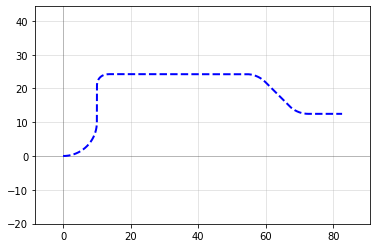

In [1]:
import gdsfactory as gf
import numpy as np
import matplotlib.pyplot as plt

# gf.CONF.plotter = 'holoviews'

P = gf.Path()
P.append(gf.path.arc(radius=10, angle=90))  # Circular arc
P.append(gf.path.straight(length=10))  # Straight section
P.append(gf.path.euler(radius=3, angle=-90))  # Euler bend (aka "racetrack" curve)
P.append(gf.path.straight(length=40))
P.append(gf.path.arc(radius=8, angle=-45))
P.append(gf.path.straight(length=10))
P.append(gf.path.arc(radius=8, angle=45))
P.append(gf.path.straight(length=10))

gf.plot(P)

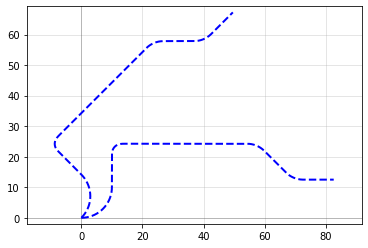

In [2]:
p2 = P.copy().rotate()
gf.plot([P, p2])

In [3]:
P.points - p2.points

array([[ 0.00000000e+00,  0.00000000e+00],
       [ 2.59744785e-02, -6.19378670e-02],
       [ 5.24914793e-02, -1.23645416e-01],
       ...,
       [ 3.00861576e+01, -4.76510048e+01],
       [ 3.01066146e+01, -4.77010155e+01],
       [ 3.30355468e+01, -5.47720833e+01]])

You can also modify our Path in the same ways as any other gdsfactory object:

- Manipulation with `move()`, `rotate()`, `mirror()`, etc
- Accessing properties like `xmin`, `y`, `center`, `bbox`, etc

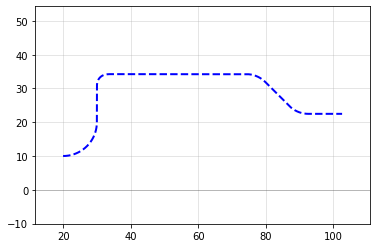

In [4]:
P.movey(10)
P.xmin = 20
gf.plot(P)

You can also check the length of the curve with the `length()` method:

In [5]:
P.length()

105.3428189759906

## CrossSection

Now that you've got your path defined, the next step is to define the cross-section of the path. To do this, you can create a blank `CrossSection` and add whatever cross-sections you want to it.
You can then combine the `Path` and the `CrossSection` using the `gf.path.extrude()` function to generate a Component:


### Option 1: Single layer and width cross-section

The simplest option is to just set the cross-section to be a constant width by passing a number to `extrude()` like so:

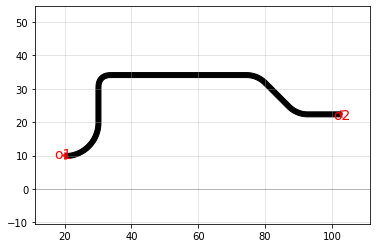

In [6]:
# Extrude the Path and the CrossSection
c = gf.path.extrude(P, layer=(1, 0), width=1.5)
c.plot()

### Option 2: Linearly-varying width

A slightly more advanced version is to make the cross-section width vary linearly from start to finish by passing a 2-element list to `extrude()` like so:

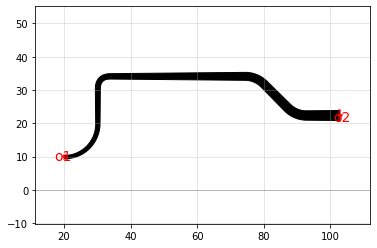

In [7]:
# Extrude the Path and the CrossSection
c = gf.path.extrude(P, layer=(1, 0), widths=(1, 3))
c.plot()

### Option 3: Arbitrary Cross-section

You can also extrude an arbitrary cross_section

Now, what if we want a more complicated straight?  For instance, in some
photonic applications it's helpful to have a shallow etch that appears on either
side of the straight (often called a trench or sleeve).  Additionally, it might be nice
to have a Port on either end of the center section so we can snap other
geometries to it.  Let's try adding something like that in:

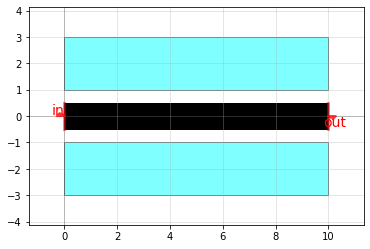

In [8]:
import gdsfactory as gf

p = gf.path.straight()

# Add a few "sections" to the cross-section
s1 = gf.Section(width=2, offset=2, layer=(2, 0))
s2 = gf.Section(width=2, offset=-2, layer=(2, 0))
x = gf.CrossSection(
    width=1, offset=0, layer=(1, 0), port_names=("in", "out"), sections=[s1, s2]
)

c = gf.path.extrude(p, cross_section=x)
c.plot()

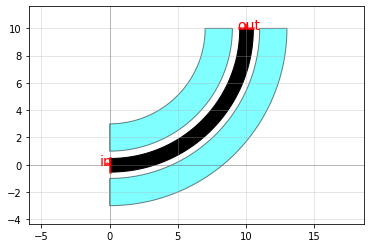

In [9]:
p = gf.path.arc()

# Combine the Path and the CrossSection
b = gf.path.extrude(p, cross_section=x)

b.plot()  # Quickplot the resulting Component

## Building Paths quickly

You can pass `append()` lists of path segments.  This makes it easy to combine
paths very quickly.  Below we show 3 examples using this functionality:

**Example 1:** Assemble a complex path by making a list of Paths and passing it
to `append()`

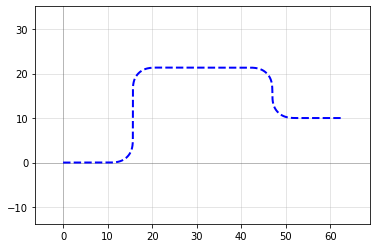

In [10]:
P = gf.Path()

# Create the basic Path components
left_turn = gf.path.euler(radius=4, angle=90)
right_turn = gf.path.euler(radius=4, angle=-90)
straight = gf.path.straight(length=10)

# Assemble a complex path by making list of Paths and passing it to `append()`
P.append(
    [
        straight,
        left_turn,
        straight,
        right_turn,
        straight,
        straight,
        right_turn,
        left_turn,
        straight,
    ]
)

gf.plot(P)

**Example 2:** Create an "S-turn" just by making a list of `[left_turn,
right_turn]`

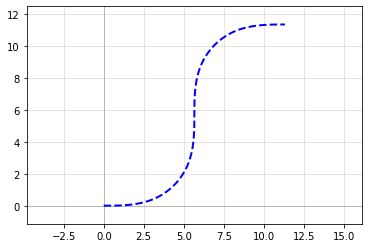

In [11]:
P = gf.Path()

# Create an "S-turn" just by making a list
s_turn = [left_turn, right_turn]

P.append(s_turn)
gf.plot(P)

**Example 3:** Repeat the S-turn 3 times by nesting our S-turn list in another
list

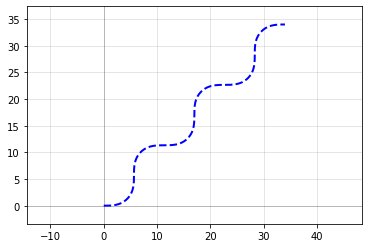

In [12]:
P = gf.Path()

# Create an "S-turn" using a list
s_turn = [left_turn, right_turn]
# Repeat the S-turn 3 times by nesting our S-turn list 3x times in another list
triple_s_turn = [s_turn, s_turn, s_turn]

P.append(triple_s_turn)
gf.plot(P)

Note you can also use the Path() constructor to immediately contruct your Path:

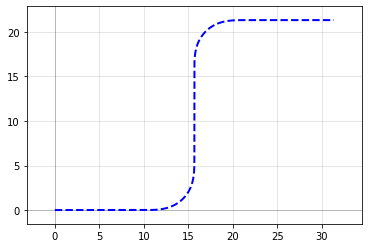

In [13]:
P = gf.Path([straight, left_turn, straight, right_turn, straight])
gf.plot(P)

## Waypoint smooth paths

You can also build smooth paths between waypoints with the `smooth()` function

(17.5, 72.5, 8.5, 41.5)

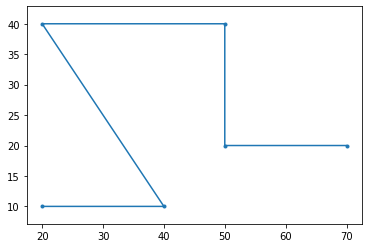

In [14]:
points = np.array([(20, 10), (40, 10), (20, 40), (50, 40), (50, 20), (70, 20)])
plt.plot(points[:, 0], points[:, 1], ".-")
plt.axis("equal")

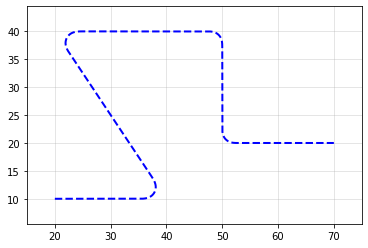

In [15]:
import gdsfactory as gf
import numpy as np
import matplotlib.pyplot as plt

points = np.array([(20, 10), (40, 10), (20, 40), (50, 40), (50, 20), (70, 20)])

P = gf.path.smooth(
    points=points,
    radius=2,
    bend=gf.path.euler,  # Alternatively, use pp.arc
    use_eff=False,
)
gf.plot(P)

## Waypoint sharp paths

It's also possible to make more traditional angular paths (e.g. electrical wires) in a few different ways.

**Example 1:** Using a simple list of points

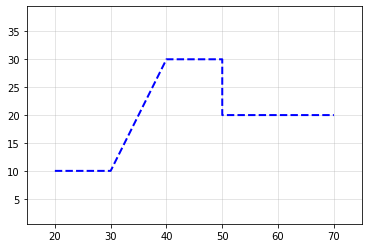

In [16]:
P = gf.Path([(20, 10), (30, 10), (40, 30), (50, 30), (50, 20), (70, 20)])
gf.plot(P)

**Example 2:** Using the "turn and move" method, where you manipulate the end angle of the Path so that when you append points to it, they're in the correct direction.  *Note: It is crucial that the number of points per straight section is set to 2 (`pp.straight(length, num_pts = 2)`) otherwise the extrusion algorithm will show defects.*

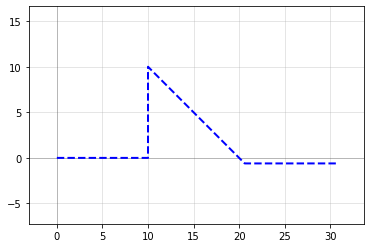

In [17]:
P = gf.Path()
P.append(gf.path.straight(length=10, npoints=2))
P.end_angle += 90  # "Turn" 90 deg (left)
P.append(gf.path.straight(length=10, npoints=2))  # "Walk" length of 10
P.end_angle += -135  # "Turn" -135 degrees (right)
P.append(gf.path.straight(length=15, npoints=2))  # "Walk" length of 10
P.end_angle = 0  # Force the direction to be 0 degrees
P.append(gf.path.straight(length=10, npoints=2))  # "Walk" length of 10
gf.plot(P)

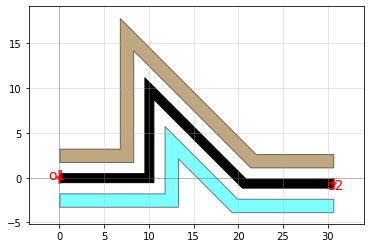

In [18]:
import gdsfactory as gf

s1 = gf.Section(width=1.5, offset=2.5, layer=(2, 0))
s2 = gf.Section(width=1.5, offset=-2.5, layer=(3, 0))
X = gf.CrossSection(width=1, offset=0, layer=(1, 0), sections=[s1, s2])
component = gf.path.extrude(P, X)
component.show()
component.plot()

## Custom curves

Now let's have some fun and try to make a loop-de-loop structure with parallel
straights and several Ports.

To create a new type of curve we simply make a function that produces an array
of points.  The best way to do that is to create a function which allows you to
specify a large number of points along that curve -- in the case below, the
`looploop()` function outputs 1000 points along a looping path.  Later, if we
want reduce the number of points in our geometry we can trivially `simplify` the
path.

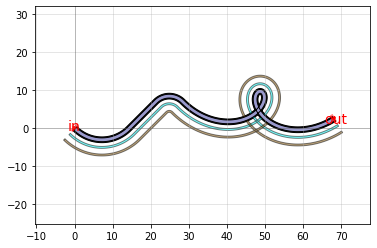

In [19]:
import numpy as np
import gdsfactory as gf


def looploop(num_pts=1000):
    """Simple limacon looping curve"""
    t = np.linspace(-np.pi, 0, num_pts)
    r = 20 + 25 * np.sin(t)
    x = r * np.cos(t)
    y = r * np.sin(t)
    points = np.array((x, y)).T
    return points


# Create the path points
P = gf.Path()
P.append(gf.path.arc(radius=10, angle=90))
P.append(gf.path.straight())
P.append(gf.path.arc(radius=5, angle=-90))
P.append(looploop(num_pts=1000))
P.rotate(-45)

# Create the crosssection
s1 = gf.Section(width=0.5, offset=2, layer=(2, 0))
s2 = gf.Section(width=0.5, offset=4, layer=(3, 0))
s3 = gf.Section(width=1, offset=0, layer=(4, 0))
X = gf.CrossSection(
    width=1.5, offset=0, layer=(1, 0), port_names=["in", "out"], sections=[s1, s2, s3]
)

c = gf.path.extrude(P, X)
c.show()
c.plot()

You can create Paths from any array of points -- just be sure that they form
smooth curves!  If we examine our path `P` we can see that all we've simply
created a long list of points:

In [20]:
import numpy as np

path_points = P.points  # Curve points are stored as a numpy array in P.points
print(np.shape(path_points))  # The shape of the array is Nx2
print(len(P))  # Equivalently, use len(P) to see how many points are inside

(1359, 2)
1359


## Simplifying / reducing point usage

One of the chief concerns of generating smooth curves is that too many points
are generated, inflating file sizes and making boolean operations
computationally expensive.  Fortunately, PHIDL has a fast implementation of the
[Ramer-Douglas–Peucker
algorithm](https://en.wikipedia.org/wiki/Ramer%E2%80%93Douglas%E2%80%93Peucker_algorithm)
that lets you reduce the number of points in a curve without changing its shape.
All that needs to be done is when you  made a component `component()` extruding the path with a cross_section, you specify the
`simplify` argument.

If we specify `simplify = 1e-3`, the number of points in the line drops from
12,000 to 4,000, and the remaining points form a line that is identical to
within `1e-3` distance from the original (for the default 1 micron unit size,
this corresponds to 1 nanometer resolution):

extrude_8a2e4b6e: uid 9, ports ['in', 'out'], aliases [], 4 polygons, 0 references


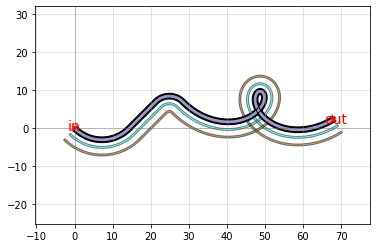

extrude_8a2e4b6e: uid 9, ports ['in', 'out'], aliases [], 4 polygons, 0 references

In [21]:
# The remaining points form a identical line to within `1e-3` from the original
c = gf.path.extrude(p=P, cross_section=X, simplify=1e-3)
c

Let's say we need fewer points.  We can increase the simplify tolerance by
specifying `simplify = 1e-1`.  This drops the number of points to ~400 points
form a line that is identical to within `1e-1` distance from the original:

extrude_35749589: uid 10, ports ['in', 'out'], aliases [], 4 polygons, 0 references


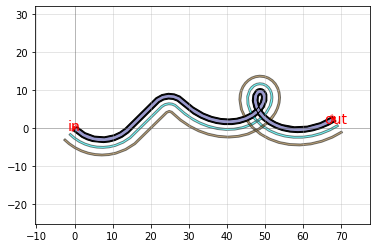

extrude_35749589: uid 10, ports ['in', 'out'], aliases [], 4 polygons, 0 references

In [22]:
c = gf.path.extrude(P, cross_section=X, simplify=1e-1)
c

Taken to absurdity, what happens if we set `simplify = 0.3`?  Once again, the
~200 remaining points form a line that is within `0.3` units from the original
-- but that line looks pretty bad.

extrude_f44b077c: uid 11, ports ['in', 'out'], aliases [], 4 polygons, 0 references


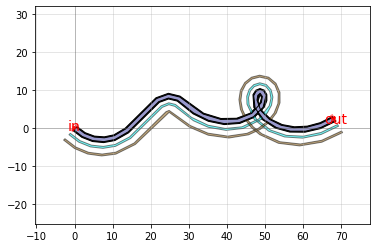

extrude_f44b077c: uid 11, ports ['in', 'out'], aliases [], 4 polygons, 0 references

In [23]:
c = gf.path.extrude(P, cross_section=X, simplify=0.3)
c

## Curvature calculation

The `Path` class has a `curvature()` method that computes the curvature `K` of
your smooth path (K = 1/(radius of curvature)).  This can be helpful for
verifying that your curves transition smoothly such as in [track-transition
curves](https://en.wikipedia.org/wiki/Track_transition_curve) (also known as
"Euler" bends in the photonics world). Euler bends have lower mode-missmatch loss as explained in [this paper](https://www.osapublishing.org/oe/fulltext.cfm?uri=oe-27-22-31394&id=422321)

Note this curvature is numerically computed so areas where the curvature jumps
instantaneously (such as between an arc and a straight segment) will be slightly
interpolated, and sudden changes in point density along the curve can cause
discontinuities.

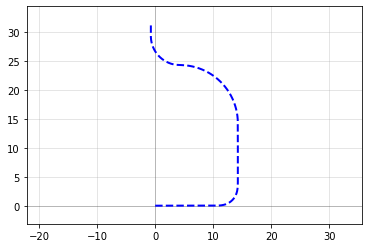

In [24]:
import matplotlib.pyplot as plt
import gdsfactory as gf

straight_points = 100

P = gf.Path()
P.append(
    [
        gf.path.straight(
            length=10, npoints=straight_points
        ),  # Should have a curvature of 0
        gf.path.euler(
            radius=3, angle=90, p=0.5, use_eff=False
        ),  # Euler straight-to-bend transition with min. bend radius of 3 (max curvature of 1/3)
        gf.path.straight(
            length=10, npoints=straight_points
        ),  # Should have a curvature of 0
        gf.path.arc(radius=10, angle=90),  # Should have a curvature of 1/10
        gf.path.arc(radius=5, angle=-90),  # Should have a curvature of -1/5
        gf.path.straight(
            length=2, npoints=straight_points
        ),  # Should have a curvature of 0
    ]
)

gf.plot(P)

Arc paths are equivalent to `bend_circular` and euler paths are equivalent to `bend_euler`

Text(0, 0.5, 'Curvature')

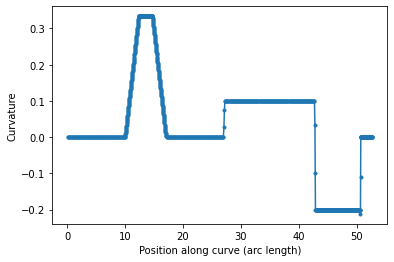

In [25]:
s, K = P.curvature()
plt.plot(s, K, ".-")
plt.xlabel("Position along curve (arc length)")
plt.ylabel("Curvature")

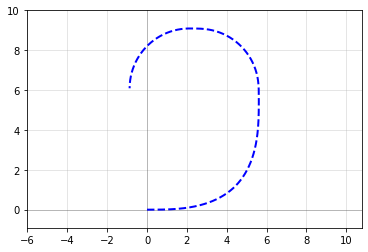

In [26]:
P = gf.path.euler(radius=3, angle=90, p=1.0, use_eff=False)
P.append(gf.path.euler(radius=3, angle=90, p=0.2, use_eff=False))
P.append(gf.path.euler(radius=3, angle=90, p=0.0, use_eff=False))
gf.plot(P)

Text(0, 0.5, 'Curvature')

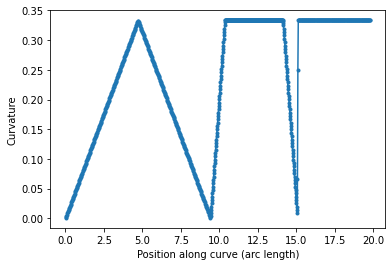

In [27]:
s, K = P.curvature()
plt.plot(s, K, ".-")
plt.xlabel("Position along curve (arc length)")
plt.ylabel("Curvature")

You can compare two 90 degrees euler bend with 180 euler bend.

A 180 euler bend is shorter, and has less loss than two 90 degrees euler bend.

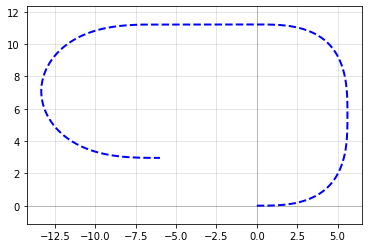

In [28]:
import matplotlib.pyplot as plt
import gdsfactory as gf

straight_points = 100

P = gf.Path()
P.append(
    [
        gf.path.euler(radius=3, angle=90, p=1, use_eff=False),
        gf.path.euler(radius=3, angle=90, p=1, use_eff=False),
        gf.path.straight(length=6, npoints=100),
        gf.path.euler(radius=3, angle=180, p=1, use_eff=False),
    ]
)

gf.plot(P)

Text(0, 0.5, 'Curvature')

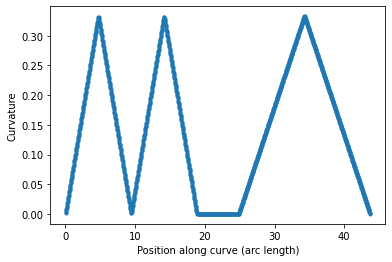

In [29]:
s, K = P.curvature()
plt.plot(s, K, ".-")
plt.xlabel("Position along curve (arc length)")
plt.ylabel("Curvature")

## Transitioning between cross-sections

Often a critical element of building paths is being able to transition between
cross-sections.  You can use the `transition()` function to do exactly this: you
simply feed it two `CrossSection`s and it will output a new `CrossSection` that
smoothly transitions between the two.

Let's start off by creating two cross-sections we want to transition between.
Note we give all the cross-sectional elements names by specifying the `name`
argument in the `add()` function -- this is important because the transition
function will try to match names between the two input cross-sections, and any
names not present in both inputs will be skipped.

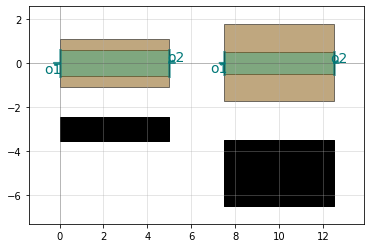

In [30]:
import numpy as np
import gdsfactory as gf

# Create our first CrossSection
s1 = gf.Section(width=2.2, offset=0, layer=(3, 0), name="etch")
s2 = gf.Section(width=1.1, offset=3, layer=(1, 0), name="wg2")
X1 = gf.CrossSection(
    width=1.2,
    offset=0,
    layer=(2, 0),
    name="wg",
    port_names=("o1", "o2"),
    sections=[s1, s2],
)

# Create the second CrossSection that we want to transition to
s1 = gf.Section(width=3.5, offset=0, layer=(3, 0), name="etch")
s2 = gf.Section(width=3, offset=5, layer=(1, 0), name="wg2")
X2 = gf.CrossSection(
    width=1,
    offset=0,
    layer=(2, 0),
    name="wg",
    port_names=("o1", "o2"),
    sections=[s1, s2],
)

# To show the cross-sections, let's create two Paths and
# create Devices by extruding them
P1 = gf.path.straight(length=5)
P2 = gf.path.straight(length=5)
wg1 = gf.path.extrude(P1, X1)
wg2 = gf.path.extrude(P2, X2)

# Place both cross-section Devices and quickplot them
c = gf.Component()
wg1ref = c << wg1
wg2ref = c << wg2
wg2ref.movex(7.5)

c.plot()

Now let's create the transitional CrossSection by calling `transition()` with
these two CrossSections as input. If we want the width to vary as a smooth
sinusoid between the sections, we can set `width_type` to `'sine'`
(alternatively we could also use `'linear'`).

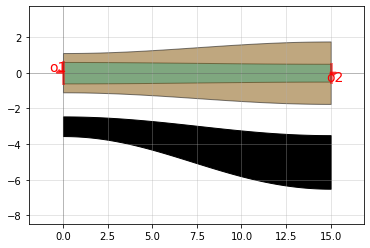

In [31]:
# Create the transitional CrossSection
Xtrans = gf.path.transition(cross_section1=X1, cross_section2=X2, width_type="sine")
# Create a Path for the transitional CrossSection to follow
P3 = gf.path.straight(length=15, npoints=100)
# Use the transitional CrossSection to create a Component
straight_transition = gf.path.extrude(P3, Xtrans)
straight_transition.show()
straight_transition.plot()

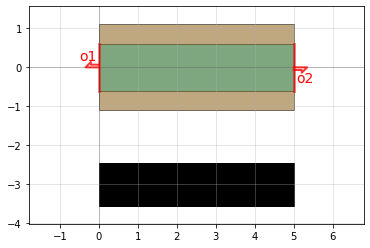

In [32]:
wg1.plot()

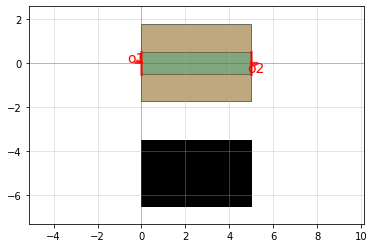

In [33]:
wg2.plot()

Now that we have all of our components, let's `connect()` everything and see
what it looks like

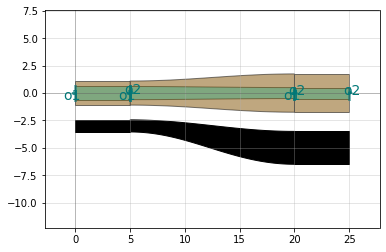

In [34]:
c = gf.Component("transition_demo")

wg1ref = c << wg1
wgtref = c << straight_transition
wg2ref = c << wg2

wgtref.connect("o1", wg1ref.ports["o2"])
wg2ref.connect("o1", wgtref.ports["o2"])

c.show()
c.plot()

Note that since `transition()` outputs a `CrossSection`, we can make the
transition follow an arbitrary path:

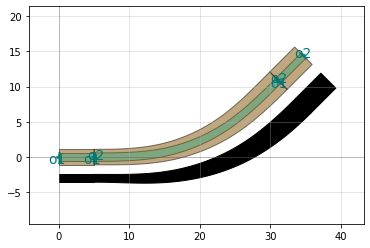

In [35]:
# Transition along a curving Path
P4 = gf.path.euler(radius=25, angle=45, p=0.5, use_eff=False)
wg_trans = gf.path.extrude(P4, Xtrans)

c = gf.Component()
wg1_ref = c << wg1  # First cross-section Component
wg2_ref = c << wg2
wgt_ref = c << wg_trans

wgt_ref.connect("o1", wg1_ref.ports["o2"])
wg2_ref.connect("o1", wgt_ref.ports["o2"])

c.plot()

## Variable width / offset

In some instances, you may want to vary the width or offset of the path's cross-
section as it travels.  This can be accomplished by giving the `CrossSection`
arguments that are functions or lists.  Let's say we wanted a width that varies
sinusoidally along the length of the Path.  To do this, we need to make a width
function that is parameterized from 0 to 1: for an example function
`my_width_fun(t)` where the width at `t==0` is the width at the beginning of the
Path and the width at `t==1` is the width at the end.

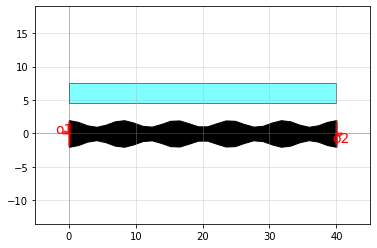

In [36]:
def my_custom_width_fun(t):
    # Note: Custom width/offset functions MUST be vectorizable--you must be able
    # to call them with an array input like my_custom_width_fun([0, 0.1, 0.2, 0.3, 0.4])
    num_periods = 5
    w = 3 + np.cos(2 * np.pi * t * num_periods)
    return w


# Create the Path
P = gf.path.straight(length=40, npoints=30)

# Create two cross-sections: one fixed width, one modulated by my_custom_offset_fun
s = gf.Section(width=my_custom_width_fun, offset=0, layer=(1, 0))
X = gf.CrossSection(width=3, offset=-6, layer=(2, 0), sections=[s])

# Extrude the Path to create the Component
c = gf.path.extrude(P, cross_section=X)
c.plot()
c.show()

We can do the same thing with the offset argument:

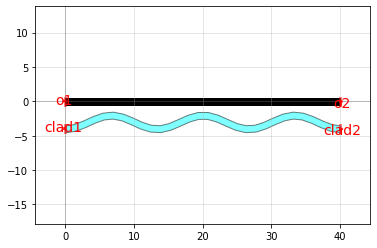

In [37]:
def my_custom_offset_fun(t):
    # Note: Custom width/offset functions MUST be vectorizable--you must be able
    # to call them with an array input like my_custom_offset_fun([0, 0.1, 0.2, 0.3, 0.4])
    num_periods = 3
    w = 3 + np.cos(2 * np.pi * t * num_periods)
    return w


# Create the Path
P = gf.path.straight(length=40, npoints=30)

# Create two cross-sections: one fixed offset, one modulated by my_custom_offset_fun
s = gf.Section(
    width=1, offset=my_custom_offset_fun, layer=(2, 0), port_names=["clad1", "clad2"]
)
X = gf.CrossSection(width=1, offset=0, layer=(1, 0), sections=[s])

# Extrude the Path to create the Component
c = gf.path.extrude(P, cross_section=X)
c.plot()

## Offsetting a Path

Sometimes it's convenient to start with a simple Path and offset the line it
follows to suit your needs (without using a custom-offset CrossSection).  Here,
we start with two copies of  simple straight Path and use the `offset()`
function to directly modify each Path.

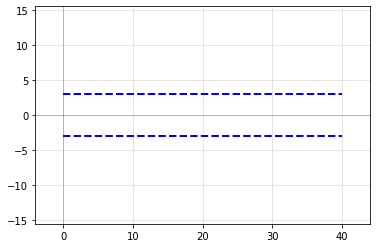

In [38]:
def my_custom_offset_fun(t):
    # Note: Custom width/offset functions MUST be vectorizable--you must be able
    # to call them with an array input like my_custom_offset_fun([0, 0.1, 0.2, 0.3, 0.4])
    num_periods = 1
    w = 2 + np.cos(2 * np.pi * t * num_periods)
    return w


P1 = gf.path.straight(length=40)
P2 = P1.copy()  # Make a copy of the Path

P1.offset(offset=my_custom_offset_fun)
P2.offset(offset=my_custom_offset_fun)
P2.mirror((1, 0))  # reflect across X-axis

gf.plot([P1, P2])

## Modifying a CrossSection

In case you need to modify the CrossSection, it can be done simply by specifying
a `name` argument for the cross-sectional element you want to modify later.
Here is an example where we name one of thee cross-sectional elements
`'myelement1'` and `'myelement2'`:

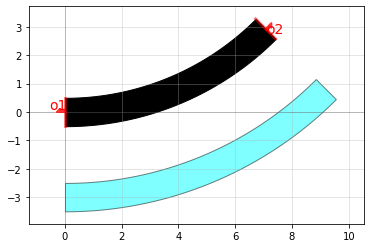

In [39]:
# Create the Path
P = gf.path.arc(radius=10, angle=45)

# Create two cross-sections: one fixed width, one modulated by my_custom_offset_fun
s = gf.Section(width=1, offset=3, layer=(2, 0), name="waveguide")
X = gf.CrossSection(
    width=1,
    offset=0,
    layer=(1, 0),
    port_names=("o1", "o2"),
    name="heater",
    sections=[s],
)


c = gf.path.extrude(P, X)
c.plot()

In case we want to change any of the CrossSection elements, we simply access the
Python dictionary that specifies that element and modify the values

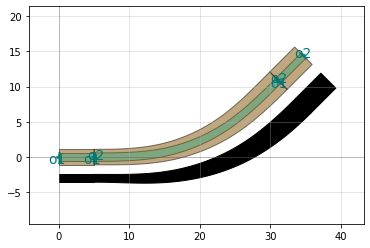

In [40]:
import gdsfactory as gf

# Create our first CrossSection
s1 = gf.Section(width=2.2, offset=0, layer=(3, 0), name="etch")
s2 = gf.Section(width=1.1, offset=3, layer=(1, 0), name="wg2")
X1 = gf.CrossSection(
    width=1.2,
    offset=0,
    layer=(2, 0),
    name="wg",
    port_names=("o1", "o2"),
    sections=[s1, s2],
)

# Create the second CrossSection that we want to transition to
s1 = gf.Section(width=3.5, offset=0, layer=(3, 0), name="etch")
s2 = gf.Section(width=3, offset=5, layer=(1, 0), name="wg2")
X2 = gf.CrossSection(
    width=1,
    offset=0,
    layer=(2, 0),
    name="wg",
    port_names=("o1", "o2"),
    sections=[s1, s2],
)

Xtrans = gf.path.transition(cross_section1=X1, cross_section2=X2, width_type="sine")


P1 = gf.path.straight(length=5)
P2 = gf.path.straight(length=5)
wg1 = gf.path.extrude(P1, X1)
wg2 = gf.path.extrude(P2, X2)

P4 = gf.path.euler(radius=25, angle=45, p=0.5, use_eff=False)
wg_trans = gf.path.extrude(P4, Xtrans)
# WG_trans = P4.extrude(Xtrans)


c = gf.Component()
wg1_ref = c << wg1
wg2_ref = c << wg2
wgt_ref = c << wg_trans

wgt_ref.connect("o1", wg1_ref.ports["o2"])
wg2_ref.connect("o1", wgt_ref.ports["o2"])

c.plot()

In [41]:
len(c.references)

3

**Note**

Any unamed section in the CrossSection won't be transitioned.

If you don't add any named sections in a cross-section it will give you an error when making a transition

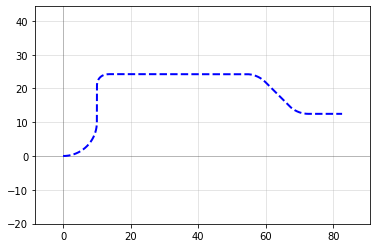

In [42]:
import gdsfactory as gf
import numpy as np

P = gf.Path()
P.append(gf.path.arc(radius=10, angle=90))  # Circular arc
P.append(gf.path.straight(length=10))  # Straight section
P.append(gf.path.euler(radius=3, angle=-90))  # Euler bend (aka "racetrack" curve)
P.append(gf.path.straight(length=40))
P.append(gf.path.arc(radius=8, angle=-45))
P.append(gf.path.straight(length=10))
P.append(gf.path.arc(radius=8, angle=45))
P.append(gf.path.straight(length=10))

gf.plot(P)

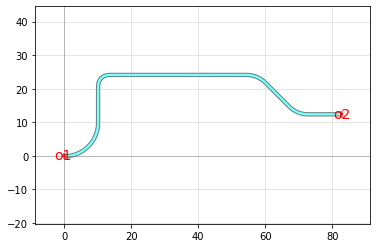

In [43]:
X1 = gf.CrossSection(width=1, offset=0, layer=(2, 0))
c = gf.path.extrude(P, X1)
c.plot()

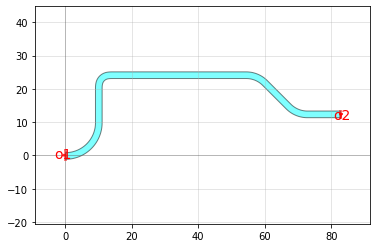

In [44]:
X2 = gf.CrossSection(width=2, offset=0, layer=(2, 0))
c = gf.path.extrude(P, X2)
c.plot()

For example this will give you an error
```
T = gf.path.transition(X, X2)
```

**Solution**

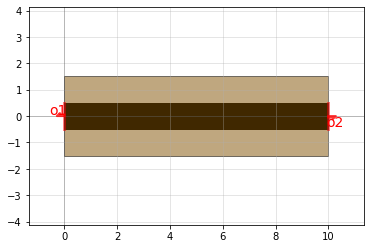

In [45]:
P = gf.path.straight(length=10, npoints=101)

s = gf.Section(width=3, offset=0, layer=gf.LAYER.SLAB90)
X1 = gf.CrossSection(
    width=1,
    offset=0,
    layer=gf.LAYER.WG,
    name="core",
    port_names=("o1", "o2"),
    sections=[s],
)
c = gf.path.extrude(P, X1)
c.plot()

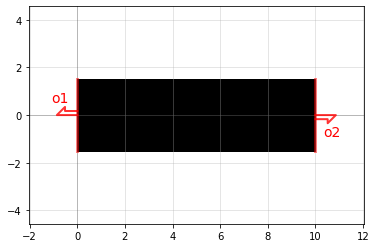

In [46]:
X2 = gf.CrossSection(
    width=3, offset=0, layer=gf.LAYER.WG, name="core", port_names=("o1", "o2")
)
c2 = gf.path.extrude(P, X2)
c2.plot()

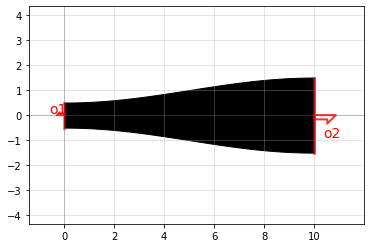

In [47]:
T = gf.path.transition(X1, X2)
c3 = gf.path.extrude(P, T)
c3.plot()

In [48]:
c4 = gf.Component()

In [49]:
start_ref = c4 << c
trans_ref = c4 << c3
end_ref = c4 << c2

trans_ref.connect("o1", start_ref.ports["o2"])
end_ref.connect("o1", trans_ref.ports["o2"])

DeviceReference (parent Device "extrude_a77ad437", ports ['o1', 'o2'], origin [20.  0.], rotation 0, x_reflection False)

/home/runner/work/gdsfactory/gdsfactory/gdsfactory/component.py:946: UserWarning: Component 'Unnamed_f711dc4b' contains 1 Unnamed cells
  warnings.warn(


Unnamed_f711dc4b: uid 32, ports [], aliases [], 0 polygons, 3 references


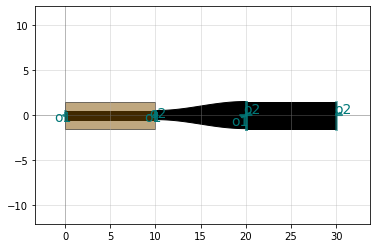

Unnamed_f711dc4b: uid 32, ports [], aliases [], 0 polygons, 3 references

In [50]:
c4

## cross-section

You can create functions that return a cross_section in 2 ways:

- `gf.partial` can customize an existing cross-section for example `gf.cross_section.strip`
- define a function that returns a cross_section

What parameters do `cross_section` take?

In [51]:
import gdsfactory as gf
from gdsfactory.tech import Section

In [52]:
help(gf.cross_section.cross_section)

Help on cython_function_or_method in module gdsfactory.cross_section:

cross_section(width: Union[Callable, float] = 0.5, offset: Union[float, Callable] = 0, layer: Tuple[int, int] = (1, 0), width_wide: Optional[float] = None, auto_widen: bool = False, auto_widen_minimum_length: float = 200.0, taper_length: float = 10.0, radius: Optional[float] = 10.0, sections: Optional[Tuple[gdsfactory.tech.Section, ...]] = None, port_names: Tuple[str, str] = ('o1', 'o2'), port_types: Tuple[str, str] = ('optical', 'optical'), min_length: float = 0.01, start_straight_length: float = 0.01, end_straight_length: float = 0.01, snap_to_grid: Optional[float] = None, bbox_layers: Optional[List[Tuple[int, int]]] = None, bbox_offsets: Optional[List[float]] = None, info: Optional[Dict[str, Any]] = None, decorator: Optional[Callable] = None) -> gdsfactory.cross_section.CrossSection
    Return CrossSection.
    
    Args:
        width: (um) or function that is parameterized from 0 to 1.
            the width at 

In [53]:
pin = gf.partial(
    gf.cross_section.strip,
    layer=(2, 0),
    sections=(
        Section(layer=gf.LAYER.P, width=2, offset=+2),
        Section(layer=gf.LAYER.N, width=2, offset=-2),
    ),
)

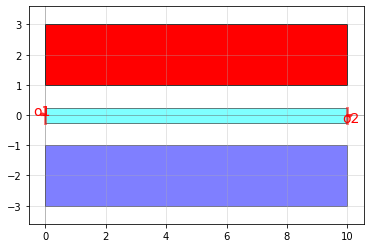

In [54]:
c = gf.components.straight(cross_section=pin)
c.plot()

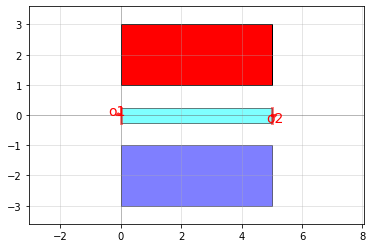

In [55]:
pin10 = gf.components.straight(cross_section=pin, length=5)
pin10.plot()

finally, you can also pass most components Dict that define the cross-section

straight_5fab0f4d: uid 37, ports ['o1', 'o2'], aliases [], 3 polygons, 0 references


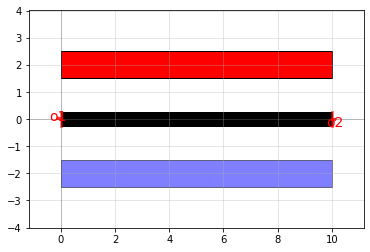

straight_5fab0f4d: uid 37, ports ['o1', 'o2'], aliases [], 3 polygons, 0 references

In [56]:
gf.components.straight(
    layer=(1, 0),
    width=0.5,
    sections=(
        Section(layer=gf.LAYER.P, width=1, offset=+2),
        Section(layer=gf.LAYER.N, width=1, offset=-2),
    ),
)

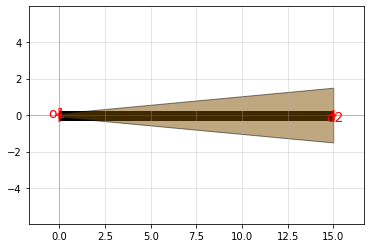

In [57]:
import numpy as np
import gdsfactory as gf

# Create our first CrossSection
s1 = gf.Section(width=0.2, offset=0, layer=(3, 0), name="slab")
X1 = gf.CrossSection(
    width=0.5, offset=0, layer=(1, 0), name="wg", port_names=("o1", "o2"), sections=[s1]
)


# Create the second CrossSection that we want to transition to
s = gf.Section(width=3.0, offset=0, layer=(3, 0), name="slab")
X2 = gf.CrossSection(
    width=0.5, offset=0, layer=(1, 0), name="wg", port_names=("o1", "o2"), sections=[s]
)

# To show the cross-sections, let's create two Paths and
# create Devices by extruding them
P1 = gf.path.straight(length=5)
P2 = gf.path.straight(length=5)
wg1 = gf.path.extrude(P1, X1)
wg2 = gf.path.extrude(P2, X2)

# Place both cross-section Devices and quickplot them
c = gf.Component()
wg1ref = c << wg1
wg2ref = c << wg2
wg2ref.movex(7.5)

# Create the transitional CrossSection
Xtrans = gf.path.transition(cross_section1=X1, cross_section2=X2, width_type="linear")
# Create a Path for the transitional CrossSection to follow
P3 = gf.path.straight(length=15, npoints=100)
# Use the transitional CrossSection to create a Component
straight_transition = gf.path.extrude(P3, Xtrans)
straight_transition.plot()

In [58]:
s = gf.export.to_3d(straight_transition, layer_set=gf.layers.LAYER_SET)
s.show()

/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/IPython/core/display.py:419: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## Waveguides with Shear Faces
By default, an extruded path will end in a face orthogonal to the direction of the path. In some cases, it is desired to have a sheared face that tilts at a given angle from this orthogonal baseline. This can be done by supplying the parameters `shear_angle_start` and `shear_angle_end` to the `extrude()` function.

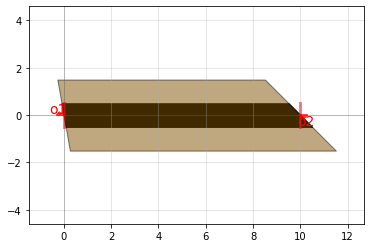

In [59]:
import numpy as np
import gdsfactory as gf

P = gf.path.straight(length=10)

s = gf.Section(width=3, offset=0, layer=gf.LAYER.SLAB90)
X1 = gf.CrossSection(
    width=1,
    offset=0,
    layer=gf.LAYER.WG,
    name="core",
    port_names=("o1", "o2"),
    sections=[s],
)
c = gf.path.extrude(P, X1, shear_angle_start=10, shear_angle_end=45)
c.plot()

By default, the shear angle parameters are `None`, in which case shearing will not be applied to the face.

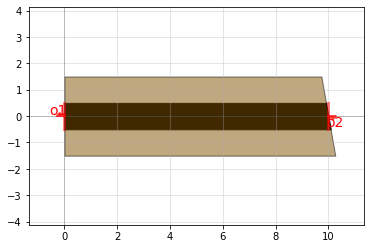

In [60]:
c = gf.path.extrude(P, X1, shear_angle_start=None, shear_angle_end=10)
c.plot()

Shearing should work on paths of arbitrary orientation, as long as their end segments are sufficiently long.

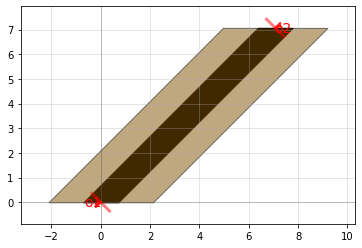

In [61]:
angle = 45
P = gf.path.straight(length=10).rotate(angle)
c = gf.path.extrude(P, X1, shear_angle_start=angle, shear_angle_end=angle)
c.plot()

For a non-linear path or width profile, the algorithm will intersect the path when sheared inwards and extrapolate linearly going outwards.

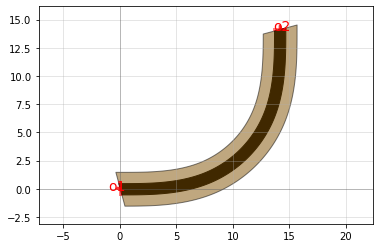

In [62]:
angle = 15
P = gf.path.euler()
c = gf.path.extrude(P, X1, shear_angle_start=angle, shear_angle_end=angle)
c.plot()

The port location, width and orientation remains the same for a sheared component. However, an additional property, `shear_angle` is set to the value of the shear angle. In general, shear ports can be safely connected together.

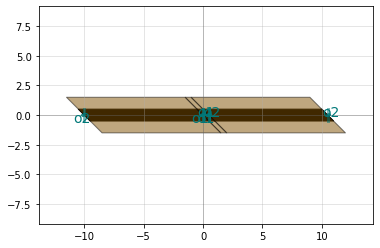

{'name': 'o1', 'width': 1, 'midpoint': [0.0, 0.0], 'orientation': 0, 'layer': [1, 0], 'port_type': 'optical', 'shear_angle': 45}
{'name': 'o2', 'width': 1, 'midpoint': [10.5, 0.0], 'orientation': 0, 'layer': [1, 0], 'port_type': 'optical', 'shear_angle': 45}


In [63]:
P = gf.path.straight(length=10)
P_skinny = gf.path.straight(length=0.5)

s = gf.Section(width=3, offset=0, layer=gf.LAYER.SLAB90, name="slab")
X1 = gf.CrossSection(
    width=1,
    offset=0,
    layer=gf.LAYER.WG,
    name="core",
    port_names=("o1", "o2"),
    sections=[s],
)

c = gf.path.extrude(P, X1, shear_angle_start=45, shear_angle_end=45)
c_skinny = gf.path.extrude(P_skinny, X1, shear_angle_start=45, shear_angle_end=45)

circuit = gf.Component()
c1 = circuit << c
c2 = circuit << c_skinny
c3 = circuit << c

c1.connect(port="o1", destination=c2.ports["o1"])
c3.connect(port="o1", destination=c2.ports["o2"])
circuit.plot()
print(c1.ports["o1"].to_dict())
print(c3.ports["o2"].to_dict())

### Transitions with Shear faces
You can also create a transition with a shear face

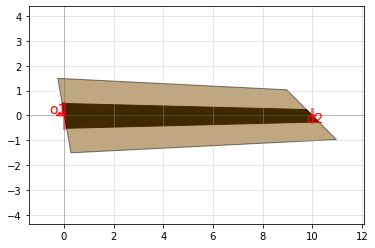

In [64]:
import numpy as np
import gdsfactory as gf

P = gf.path.straight(length=10)

s = gf.Section(width=3, offset=0, layer=gf.LAYER.SLAB90, name="slab")
X1 = gf.CrossSection(
    width=1,
    offset=0,
    layer=gf.LAYER.WG,
    name="core",
    port_names=("o1", "o2"),
    sections=[s],
)
s2 = gf.Section(width=2, offset=0, layer=gf.LAYER.SLAB90, name="slab")
X2 = gf.CrossSection(
    width=0.5,
    offset=0,
    layer=gf.LAYER.WG,
    name="core",
    port_names=("o1", "o2"),
    sections=[s2],
)
t = gf.path.transition(X1, X2, width_type="linear")
c = gf.path.extrude(P, t, shear_angle_start=10, shear_angle_end=45)
c.plot()

This will also work with curves and non-linear width profiles. Keep in mind that points outside the original geometry will be extrapolated linearly.

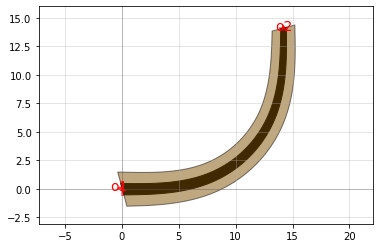

In [65]:
angle = 15
P = gf.path.euler()
c = gf.path.extrude(P, t, shear_angle_start=angle, shear_angle_end=angle)
c.plot()